## 📚 Diccionario de Datos

| Columna                        | Tipo       | Descripción                                                                                         |
|-------------------------------|------------|-----------------------------------------------------------------------------------------------------|
| Previous qualification        | Entero     | Nivel de educación previo (codificado). Valores: 1 = Secundaria, 2 = Licenciatura, 3 = Grado, etc. |
| Previous qualification (grade)| Continua   | Nota de educación previa, entre 0 y 200.                                                            |
| Nacionality                   | Categórica | Nacionalidad. En este dataset: "Colombiana".                                                       |
| Mother's occupation           | Entero     | Ocupación de la madre, codificada según clasificación nacional de ocupaciones.                     |
| Father's occupation           | Entero     | Ocupación del padre, codificada.                                                                   |
| Admission grade               | Continua   | Nota de admisión universitaria, entre 0 y 200.                                                      |
| Displaced                     | Binaria    | 1 = Desplazado por violencia, 0 = No.                                                               |
| Educational special needs     | Binaria    | 1 = Necesidades educativas especiales, 0 = No.                                                      |
| Gender                        | Binaria    | 0 = Femenino, 1 = Masculino.                                                                        |
| Scholarship holder            | Binaria    | 1 = Tiene beca, 0 = No.                                                                             |
| Age at enrollment             | Entero     | Edad del estudiante al momento de ingresar.                                                        |
| GDP                           | Continua   | Producto Interno Bruto per cápita del territorio de origen.                                        |


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga de datos
df = pd.read_csv("student_data.csv")  # Cambia por el nombre real

# 1. Información general

In [3]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:\n", df.head())
print("\nTipos de datos:\n", df.dtypes)
print("\nValores nulos:\n", df.isnull().sum())

Dimensiones del dataset: (120, 12)

Primeras filas:
    Previous qualification  Previous qualification (grade) Nacionality  \
0                      39                          172.17  Colombiana   
1                      29                          123.60  Colombiana   
2                      15                          125.61  Colombiana   
3                      43                          104.04  Colombiana   
4                       8                          171.07  Colombiana   

   Mother's occupation  Father's occupation  Admission grade  Displaced  \
0                  188                   57           165.15          1   
1                  168                   57           120.67          1   
2                  160                   85           127.40          0   
3                   67                   48           121.46          0   
4                   32                  179           137.73          0   

   Educational special needs  Gender  Scholarship holder 

# 2. Estadísticas básicas

In [4]:
print("\nResumen estadístico de variables numéricas:")
print(df.describe())


Resumen estadístico de variables numéricas:
       Previous qualification  Previous qualification (grade)  \
count              120.000000                      120.000000   
mean                21.366667                      150.972667   
std                 12.516163                       27.771673   
min                  1.000000                      100.050000   
25%                  9.750000                      126.530000   
50%                 22.000000                      149.690000   
75%                 33.000000                      171.140000   
max                 43.000000                      199.770000   

       Mother's occupation  Father's occupation  Admission grade   Displaced  \
count           120.000000           120.000000       120.000000  120.000000   
mean             99.391667            96.550000       151.965833    0.116667   
std              59.428694            56.974541        27.564213    0.322369   
min               3.000000             0.000000  

# 3. Distribución de variables continuas

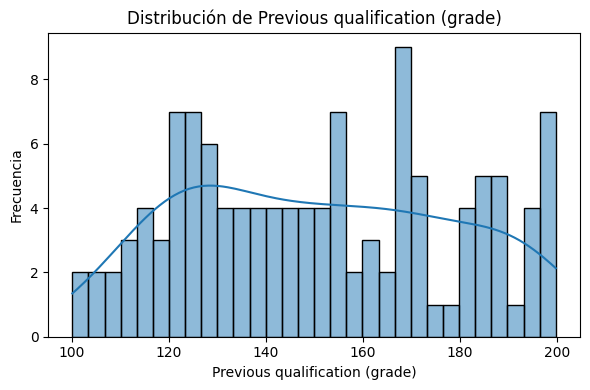

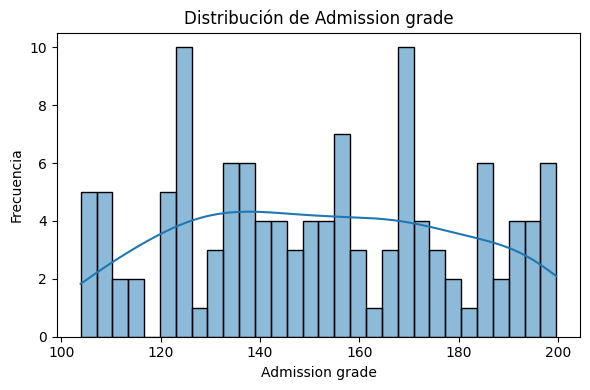

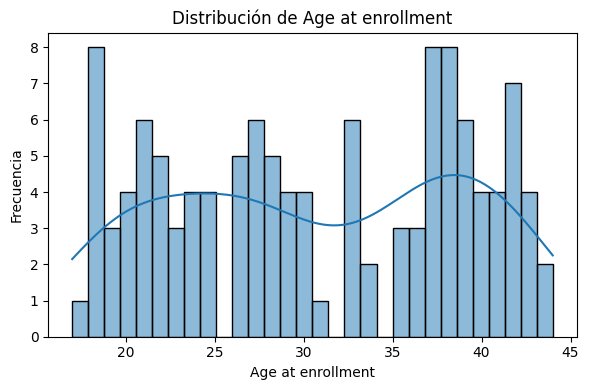

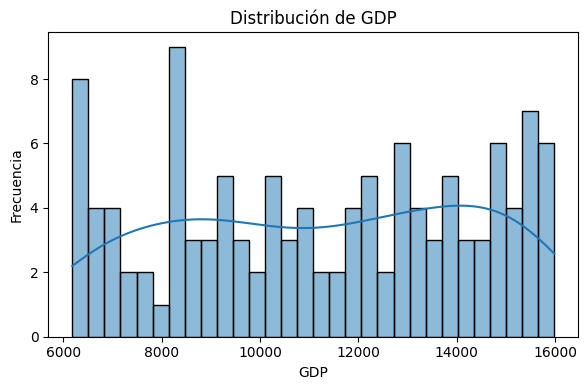

In [5]:
variables_continuas = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "GDP"
]

for col in variables_continuas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# 4. Conteo de variables categóricas / binarias

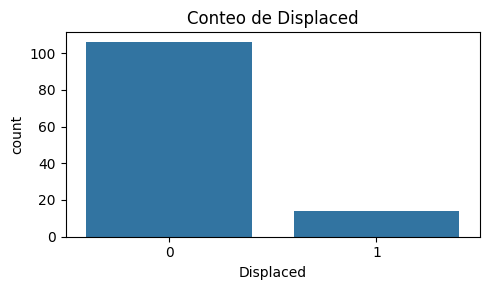

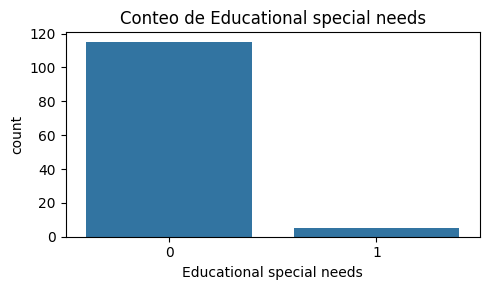

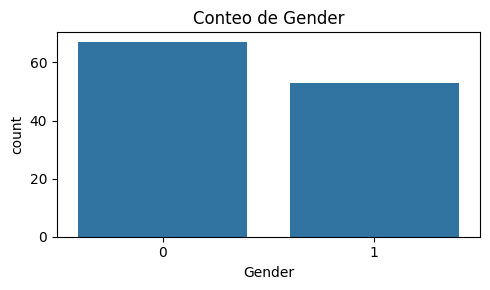

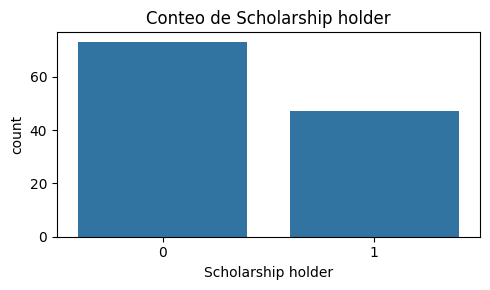

In [6]:

variables_binarias = [
    "Displaced",
    "Educational special needs",
    "Gender",
    "Scholarship holder"
]

for col in variables_binarias:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df)
    plt.title(f"Conteo de {col}")
    plt.tight_layout()
    plt.show()

# 5. Boxplots de notas por género y por beca


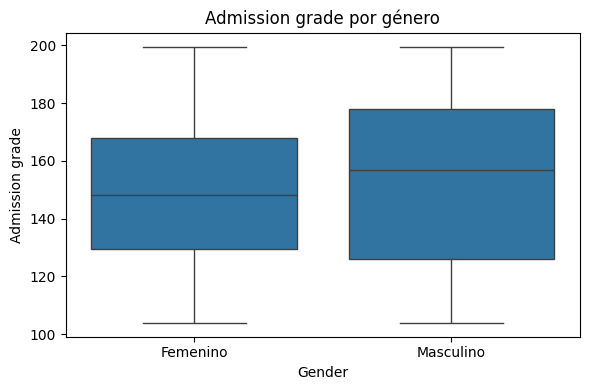

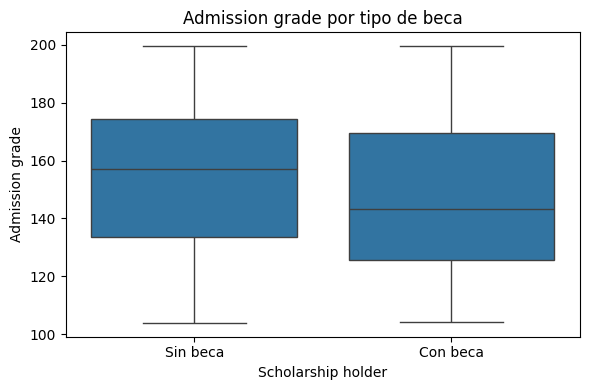

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Gender", y="Admission grade", data=df)
plt.xticks([0, 1], ["Femenino", "Masculino"])
plt.title("Admission grade por género")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="Scholarship holder", y="Admission grade", data=df)
plt.xticks([0, 1], ["Sin beca", "Con beca"])
plt.title("Admission grade por tipo de beca")
plt.tight_layout()
plt.show()

# 6. Correlación entre variables numéricas

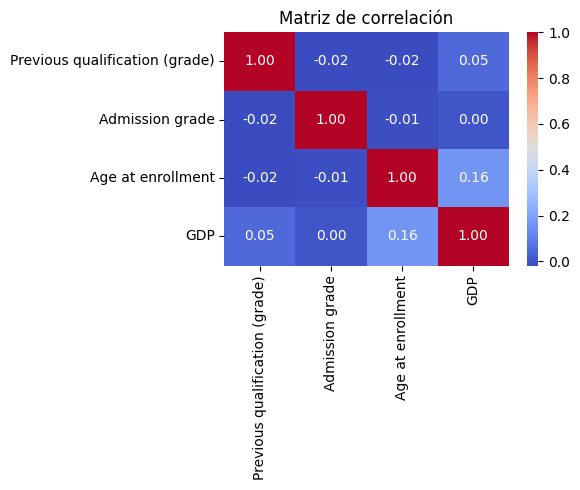

In [8]:
corr = df[variables_continuas].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

# 7. Agrupaciones estadísticas útiles

In [9]:
print("\nPromedio de Admission grade por condición de desplazado:")
print(df.groupby("Displaced")["Admission grade"].describe())

print("\nPromedio de Admission grade por género:")
print(df.groupby("Gender")["Admission grade"].describe())

print("\nPromedio de GDP por beca:")
print(df.groupby("Scholarship holder")["GDP"].describe())


Promedio de Admission grade por condición de desplazado:
           count        mean        std     min       25%     50%      75%  \
Displaced                                                                    
0          106.0  150.689717  27.669809  103.90  127.9125  149.63  170.760   
1           14.0  161.627857  25.638024  120.67  143.8250  167.83  183.515   

              max  
Displaced          
0          199.59  
1          193.09  

Promedio de Admission grade por género:
        count        mean        std     min      25%     50%     75%     max
Gender                                                                       
0        67.0  149.682836  26.263513  103.92  129.605  148.17  168.07  199.59
1        53.0  154.851887  29.121395  103.90  126.070  156.85  178.13  199.58

Promedio de GDP por beca:
                    count          mean          std      min       25%  \
Scholarship holder                                                        
0                  

Diccionario de Previous qualification

In [10]:
previous_qualification_dict = {
    1: "Secondary education",
    2: "Higher ed - bachelor's",
    3: "Higher ed - degree",
    4: "Higher ed - master's",
    5: "Higher ed - doctorate",
    6: "Higher ed - frequency",
    9: "12th year - not completed",
    10: "11th year - not completed",
    12: "Other - 11th year",
    14: "10th year",
    15: "10th year - not completed",
    19: "Basic education 3rd cycle",
    38: "Basic education 2nd cycle",
    39: "Technological specialization",
    40: "Higher ed - degree (1st cycle)",
    42: "Professional technical course",
    43: "Higher ed - master (2nd cycle)"
}


Diccionario de Mother's occupation (ocupación de la madre)

In [18]:
mother_occupation_dict = {
    0: "Student",
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    122: "Health professionals",
    123: "Teachers",
    125: "Specialists in information and communication technologies (ICT)",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    171: "Skilled construction workers and the like, except electricians",
    173: "Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    191: "Cleaning workers",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants"
}


Diccionario de Father's occupation (ocupación del padre)

In [12]:
father_occupation_dict = {
    0: "Student",
    1: "Government/Executive Director",
    2: "Scientific Specialist",
    3: "Mid-level Technician",
    4: "Administrative staff",
    5: "Services/Security/Sales",
    6: "Farmer/Fisher/Forester",
    7: "Skilled Industry/Construction",
    8: "Machine Operator",
    9: "Unskilled Worker",
    10: "Military",
    90: "Other situation",
    99: "Unknown",
    101: "Military Officer",
    102: "Military Sergeant",
    103: "Other military",
    112: "Commercial service director",
    114: "Hotel/Trade director",
    121: "Physics/Math/Engineering Specialist",
    122: "Health professional",
    123: "Teacher",
    124: "Finance/Accounting/Public Relations",
    131: "Mid-level Science/Engineering",
    132: "Mid-level Health",
    134: "Mid-level Legal/Social/Culture",
    135: "ICT Technician",
    141: "Office/Secretary/Data Entry",
    143: "Accounting/Finance Clerk",
    144: "Other admin support",
    151: "Personal service",
    152: "Seller",
    153: "Personal care",
    154: "Security/Protection",
    161: "Market-oriented farmer",
    163: "Subsistence farmer/fisher",
    171: "Construction (non-electrician)",
    172: "Metalworking",
    174: "Electrician/Electronics",
    175: "Food/Wood/Textile/Other crafts",
    181: "Plant/machine operator",
    182: "Assembly worker",
    183: "Driver/Mobile equipment",
    192: "Unskilled agro/fishing",
    193: "Unskilled construction/industry",
    194: "Kitchen assistant",
    195: "Street vendor/service"
}


In [19]:
df["Previous qualification label"] = df["Previous qualification"].map(previous_qualification_dict)
df["Mother occupation label"] = df["Mother's occupation"].map(mother_occupation_dict)
df["Father occupation label"] = df["Father's occupation"].map(father_occupation_dict)


In [14]:
df[["Previous qualification", "Previous qualification label"]].head(10)

,Previous qualification,Previous qualification label
0,39,Technological specialization
1,29,NaN
2,15,10th year - not completed
3,43,Higher ed - master (2nd cycle)
4,8,NaN
5,21,NaN
6,39,Technological specialization
7,19,Basic education 3rd cycle
8,23,NaN
9,11,NaN


In [20]:
df[[
    "Previous qualification", "Previous qualification label",
    "Mother's occupation", "Mother occupation label",
    "Father's occupation", "Father occupation label"
]].head(10)

,Previous qualification,Previous qualification label,Mother's occupation,Mother occupation label,Father's occupation,Father occupation label
0,39,Technological specialization,188,NaN,57,NaN
1,29,NaN,168,NaN,57,NaN
2,15,10th year - not completed,160,NaN,85,NaN
3,43,Higher ed - master (2nd cycle),67,NaN,48,NaN
4,8,NaN,32,NaN,179,NaN
5,21,NaN,141,"Office workers, secretaries in general and dat...",169,NaN
6,39,Technological specialization,20,NaN,69,NaN
7,19,Basic education 3rd cycle,47,NaN,14,NaN
8,23,NaN,147,NaN,53,NaN
9,11,NaN,127,NaN,187,NaN


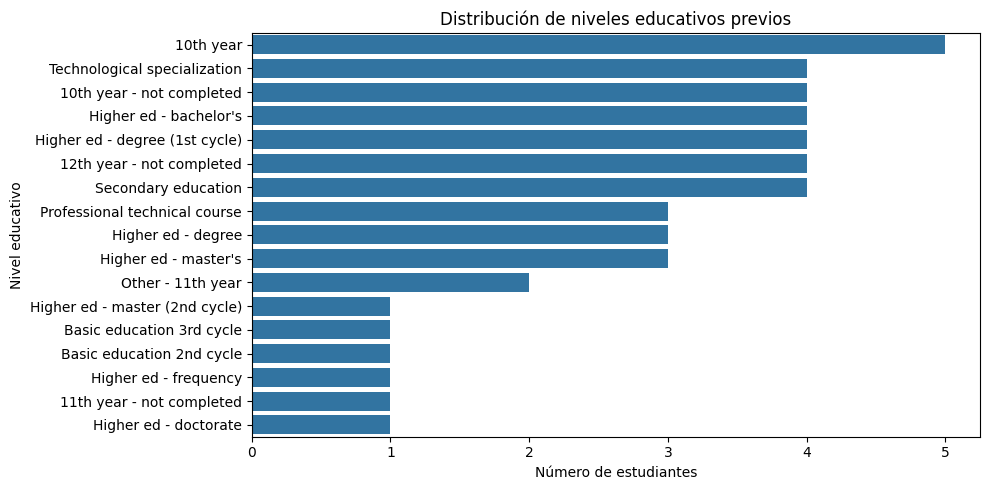

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(y="Previous qualification label", data=df, order=df["Previous qualification label"].value_counts().index)
plt.title("Distribución de niveles educativos previos")
plt.xlabel("Número de estudiantes")
plt.ylabel("Nivel educativo")
plt.tight_layout()
plt.show()


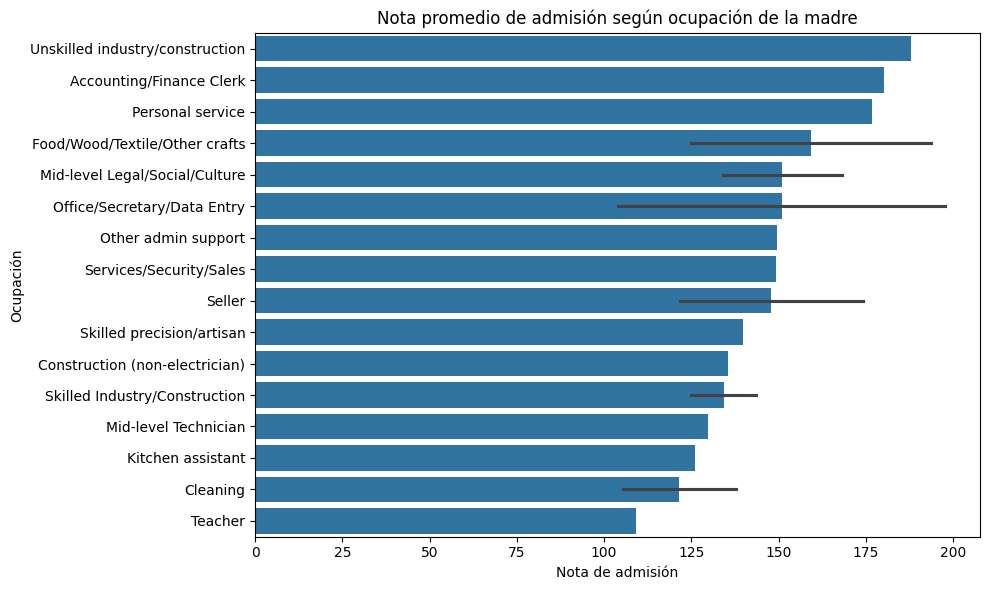

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x="Admission grade", y="Mother occupation label", data=df,
            order=df.groupby("Mother occupation label")["Admission grade"].mean().sort_values(ascending=False).index)
plt.title("Nota promedio de admisión según ocupación de la madre")
plt.xlabel("Nota de admisión")
plt.ylabel("Ocupación")
plt.tight_layout()
plt.show()


Promedio de nota de admisión por tipo de educación previa

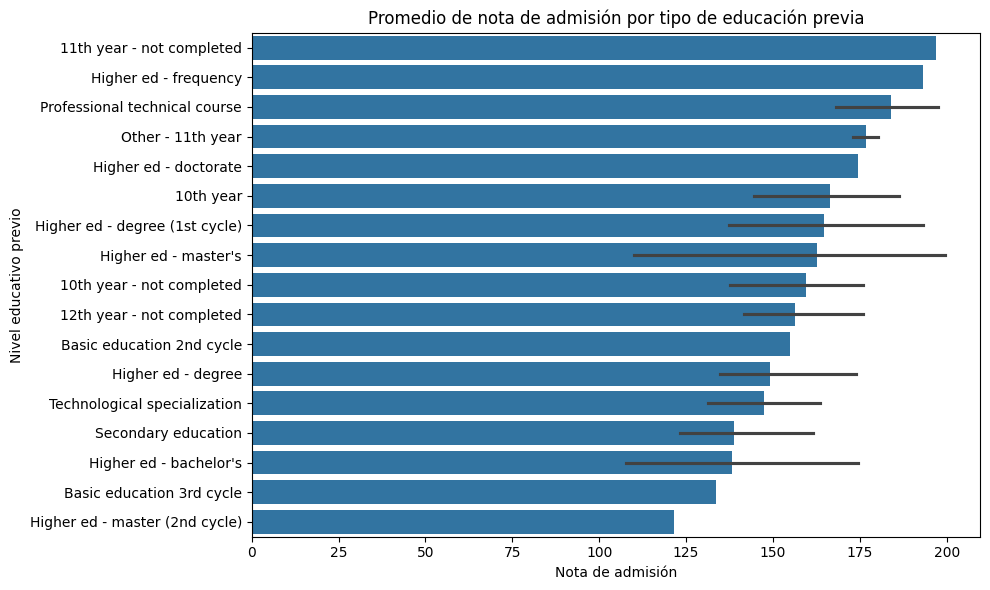

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Promedio de nota de admisión por nivel educativo previo
plt.figure(figsize=(10, 6))
sns.barplot(data=df,
            x="Admission grade",
            y="Previous qualification label",
            order=df.groupby("Previous qualification label")["Admission grade"].mean().sort_values(ascending=False).index)
plt.title("Promedio de nota de admisión por tipo de educación previa")
plt.xlabel("Nota de admisión")
plt.ylabel("Nivel educativo previo")
plt.tight_layout()
plt.show()


GDP promedio por ocupación del padre o madre

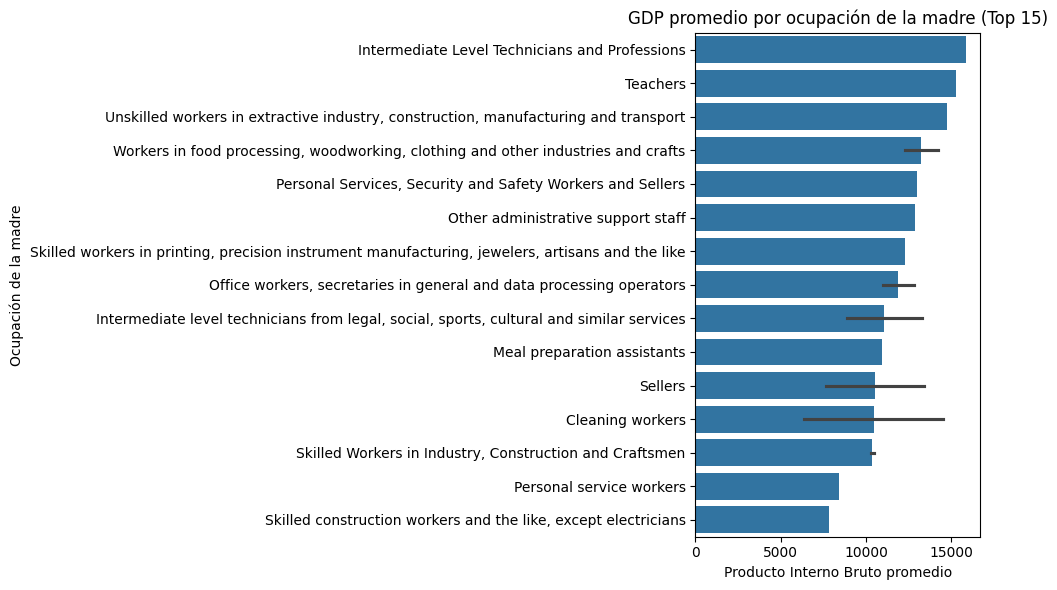

In [22]:
# Filtramos ocupaciones con mayor frecuencia para evitar categorías con muy pocos datos
top_mother_occs = df["Mother occupation label"].value_counts().head(15).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df["Mother occupation label"].isin(top_mother_occs)],
    x="GDP",
    y="Mother occupation label",
    estimator="mean",
    order=df[df["Mother occupation label"].isin(top_mother_occs)].groupby("Mother occupation label")["GDP"].mean().sort_values(ascending=False).index
)
plt.title("GDP promedio por ocupación de la madre (Top 15)")
plt.xlabel("Producto Interno Bruto promedio")
plt.ylabel("Ocupación de la madre")
plt.tight_layout()
plt.show()


Tasa de beca por sector social

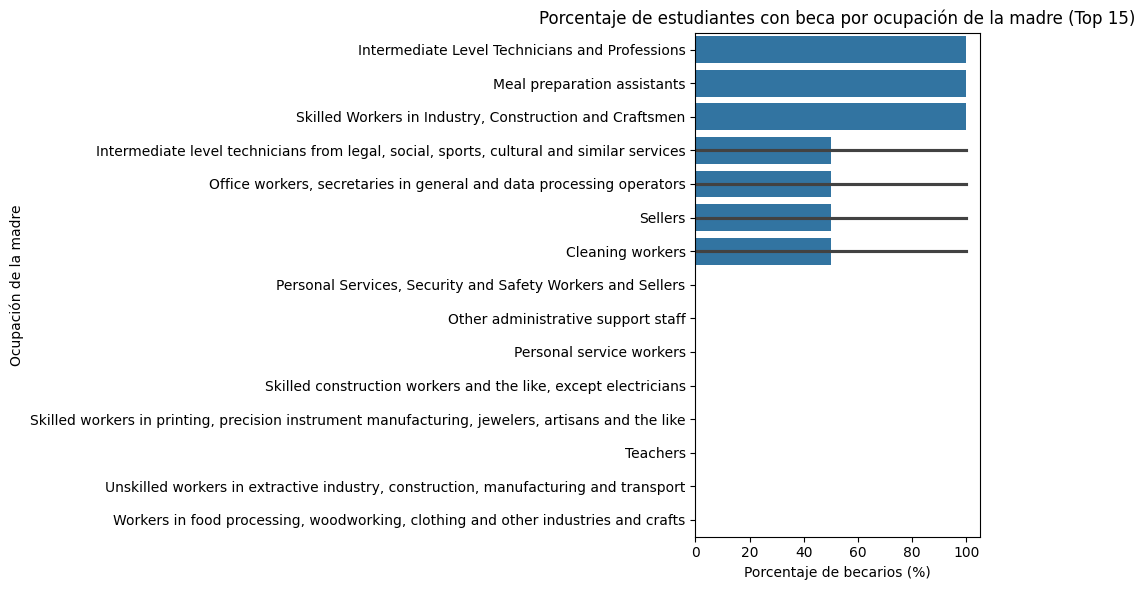

In [23]:
# Calculamos proporción de becarios
top_mother_occs = df["Mother occupation label"].value_counts().head(15).index

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df[df["Mother occupation label"].isin(top_mother_occs)],
    x="Scholarship holder",
    y="Mother occupation label",
    estimator=lambda x: 100 * x.mean(),  # porcentaje
    order=df[df["Mother occupation label"].isin(top_mother_occs)].groupby("Mother occupation label")["Scholarship holder"].mean().sort_values(ascending=False).index
)
plt.title("Porcentaje de estudiantes con beca por ocupación de la madre (Top 15)")
plt.xlabel("Porcentaje de becarios (%)")
plt.ylabel("Ocupación de la madre")
plt.tight_layout()
plt.show()